<a href="https://colab.research.google.com/github/AlumiK/tensorflow2-notebooks/blob/main/01%20Machine%20Learning%20and%20Neurons/02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv').values
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

X = X - X.mean()
y = np.log(y)

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 360.9465
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 340.9474
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 241.5247
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 190.7436
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 369.4448
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 229.6132
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 139.3248
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 87.6713
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 52.7405
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 44.9895
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 34.1981
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 19.6835
Epoch 13/200
6/6 [========================

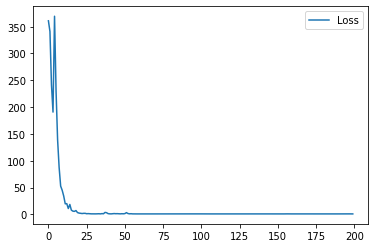

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.001 if x < 50 else 0.0001)

r = model.fit(X, y, epochs=200, callbacks=[scheduler])

plt.plot(r.history.get('loss'), label='Loss')
plt.legend()
plt.show()

Time to double: 2.018281552947584


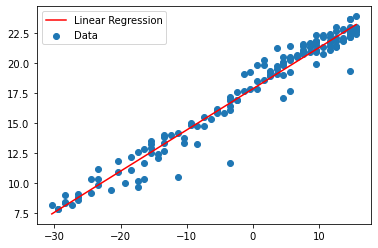

In [8]:
a = model.layers[0].get_weights()[0][0, 0]
print(f'Time to double: {np.log(2) / a}')

X_hat = np.linspace(X.min(), X.max(), 100)
y_hat = model.predict(X_hat.reshape(-1, 1))
plt.scatter(X.flatten(), y, label='Data')
plt.plot(X_hat, y_hat, color='red', label='Linear Regression')
plt.legend()
plt.show()